## 線形回帰の解釈

### t検定とF検定

In [2]:
# データ準備
import pandas as pd
df = pd.read_csv('data/sample_data2.csv')
print(df)
y_col = 'rent'
X = df.drop(columns=[y_col])
y = df[y_col]

   space       rent  age
0     20  13.958824    3
1     25  11.533805   13
2     28  14.269547   18
3     30  18.722680   10
4     36  19.602674    6
5     51  16.068166    1
6     55  23.183599    5
7     62  22.212595    2
8     83  29.357010    5
9    103  37.565129   23


In [4]:
# 線形回帰
import statsmodels.api as sma
# バイアス項追加
X = sma.add_constant(X)
print(X)

   const  space  age
0    1.0     20    3
1    1.0     25   13
2    1.0     28   18
3    1.0     30   10
4    1.0     36    6
5    1.0     51    1
6    1.0     55    5
7    1.0     62    2
8    1.0     83    5
9    1.0    103   23


In [5]:
est = sma.OLS(y, X)
est_trained = est.fit()
print(est_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.66
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           0.000282
Time:                        22:46:07   Log-Likelihood:                -22.687
No. Observations:                  10   AIC:                             51.37
Df Residuals:                       7   BIC:                             52.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4150      2.043      3.140      0.0

c:\Users\ytchi\anaconda3\envs\py37\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


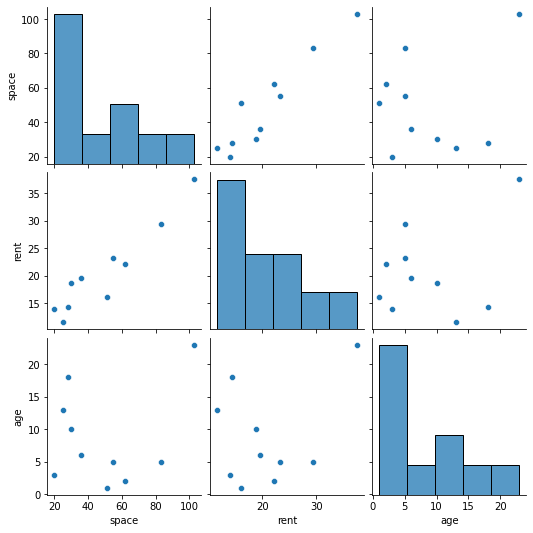

In [6]:
import seaborn as sns
sns.pairplot(df)

In [7]:
# 標準化した場合
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=[y_col])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = sma.add_constant(X_scaled)
print(X_scaled)

[[ 1.         -1.13466215 -0.8062772 ]
 [ 1.         -0.9410338   0.63350351]
 [ 1.         -0.82485679  1.35339387]
 [ 1.         -0.74740544  0.2015693 ]
 [ 1.         -0.51505142 -0.37434298]
 [ 1.          0.06583364 -1.09423334]
 [ 1.          0.22073632 -0.51832106]
 [ 1.          0.49181602 -0.95025527]
 [ 1.          1.3050551  -0.51832106]
 [ 1.          2.07956852  2.07328422]]


In [8]:
est = sma.OLS(y, X_scaled)
est_trained = est.fit()
print(est_trained.summary())

                            OLS Regression Results                            
Dep. Variable:                   rent   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.66
Date:                Sun, 01 Jan 2023   Prob (F-statistic):           0.000282
Time:                        23:03:21   Log-Likelihood:                -22.687
No. Observations:                  10   AIC:                             51.37
Df Residuals:                       7   BIC:                             52.28
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.6474      0.884     23.355      0.0

c:\Users\ytchi\anaconda3\envs\py37\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
